# Exercise 2

Assume the aperture requires a beam size $10\ \sigma<31.4$ mm. Start with the lattice from Exercise 1 and modify it so that the $\beta_{max}$ satisfies this requirement (please use rounded numbers for convenience). The normalized beam emittance is $\epsilon_n = 2.0\ \mu$m. The circumference and the energy must not be changed, all other parameters may be modified.

In [1]:
import numpy as np #NOTE: NAFFLIB requires downgrade of numpy version. Use pip install numpy==2.0.2
import matplotlib.pyplot as plt
import pandas as pd
import xobjects as xo
import xtrack as xt
import scipy

## Define new version of the lattice
Here we increase the number of cells to achieve the reduced $\beta_{max}$.

In [2]:
lcirc = 1000.0
lquad = 3.0
lbend = 5.0
max_dipole_field = 3.0
number_of_FODO = 20
number_of_dipoles = 4*number_of_FODO
k1 = 0.0098
pc_GeV = 20.0
lFODO = lcirc/number_of_FODO

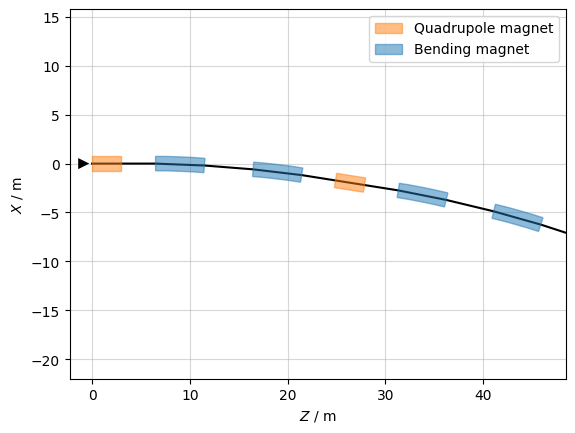

In [3]:
env = xt.Environment()
env.vars({'lcirc': lcirc,
          'lquad': lquad, 
          'lbend': lbend, 
          'k1f': k1, 
          'k1d': -k1,
          'number_of_dipoles': number_of_dipoles,
          'angle.mb': 2.0*np.pi/number_of_dipoles,
          'k0.mb': 'angle.mb/lbend',
          'number_of_fodo': number_of_FODO,
          'lfodo': 'lcirc/number_of_fodo'
          })

env.particle_ref = xt.Particles(p0c=20e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)

env.new('mb', xt.Bend, length='lbend', k0='k0.mb', h='k0.mb')
env.new('mq', xt.Quadrupole, length='lquad')

env.new('mq.f', 'mq', k1='k1f')
env.new('mq.d', 'mq', k1='k1d')

cell = env.new_line(components=[
    env.place('mq.f', at=lquad*0.5),
    env.place('mb', at='0.15 * lfodo + lquad * 0.5'),
    env.place('mb', at='0.35 * lfodo  + lquad*0.5'),
    env.place('mq.d', at='0.50 * lfodo + lquad*0.5'),
    env.place('mb', at='0.65 * lfodo + lquad*0.5'),
    env.place('mb', at='0.85 * lfodo + lquad*0.5'),
    env.new('marker_end', xt.Marker, at='lfodo'),

])

cell.survey().plot()

In [4]:
cell.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.0,Quadrupole,mq.f,True,False,None,False,"Quadrupole(k1=0.0098, k1s=0, length=3, num_mul..."
1,3.0,Drift,drift_1,True,False,None,False,Drift(length=3.5)
2,6.5,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
3,11.5,Drift,drift_2,True,False,None,False,Drift(length=5)
4,16.5,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
5,21.5,Drift,drift_3,True,False,None,False,Drift(length=3.5)
6,25.0,Quadrupole,mq.d,True,False,None,False,"Quadrupole(k1=-0.0098, k1s=0, length=3, num_mu..."
7,28.0,Drift,drift_4,True,False,None,False,Drift(length=3.5)
8,31.5,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
9,36.5,Drift,drift_5,True,False,None,False,Drift(length=5)


In [5]:
cells = env.new_line(components=[
    env.new('start', xt.Marker),
    cell,
    env.new('end', xt.Marker),
])

#%% append in cells number_of_FODO times cell
line = env.new_line(components=[env.place(cell)]*number_of_FODO)

line.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.0,Quadrupole,mq.f,True,False,None,False,"Quadrupole(k1=0.0098, k1s=0, length=3, num_mul..."
1,3.0,Drift,drift_1,True,False,None,False,Drift(length=3.5)
2,6.5,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
3,11.5,Drift,drift_2,True,False,None,False,Drift(length=5)
4,16.5,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
...,...,...,...,...,...,...,...,...
256,986.5,Drift,drift_5,True,False,None,False,Drift(length=5)
257,991.5,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
258,996.5,Drift,drift_6,True,False,None,False,Drift(length=3.5)
259,1000.0,Marker,marker_end,False,False,None,False,Marker(_dummy=np.int64(0))


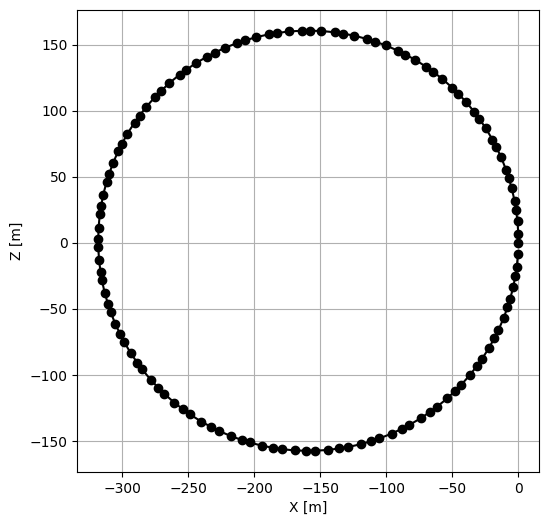

In [6]:
# 2. Definition of the beam
line.particle_ref = xt.Particles(p0c=20e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)
# %%
context = xo.ContextCpu()
line.build_tracker(_context=context)

#%%
mySurvey = line.survey()
mySurvey = mySurvey.rows[r'^(mq|mb).*']
fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(mySurvey.X, mySurvey.Z, 'o-', label="x", c="k")
plt.axis('square')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()
# %%
myTwiss= line.twiss(method='4d')

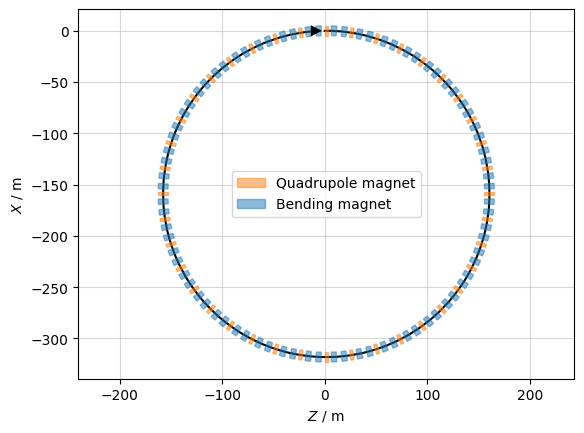

In [7]:
mySurvey.plot()

(-0.05, 0.05)

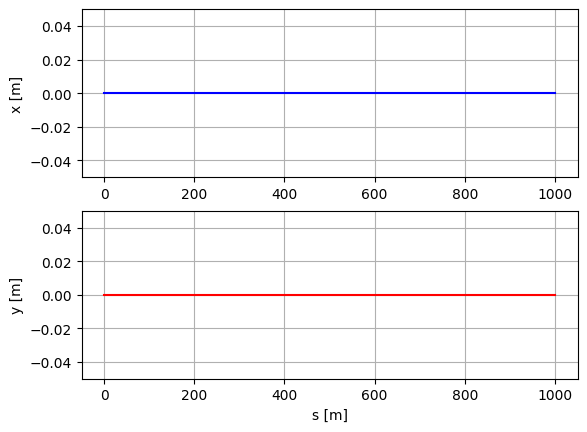

In [8]:
# The closed orbit corresponds in this case to the reference orbit
plt.subplot(211)
plt.plot(myTwiss.s,myTwiss.x,'b',label='x')
plt.ylabel('x [m]')
plt.grid()
plt.ylim(-0.05,0.05)

plt.subplot(212)
plt.plot(myTwiss.s,myTwiss.y,'r',label='y')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()
plt.ylim(-0.05,0.05)

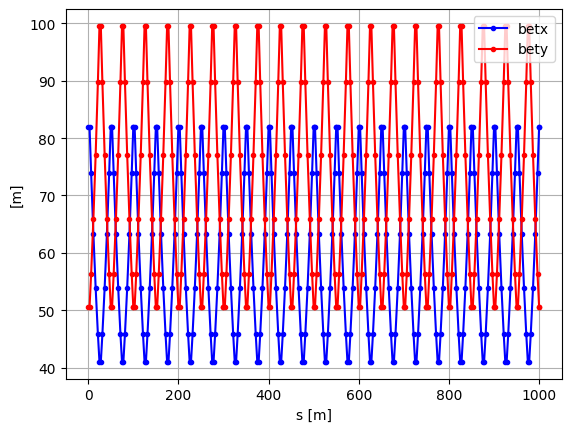

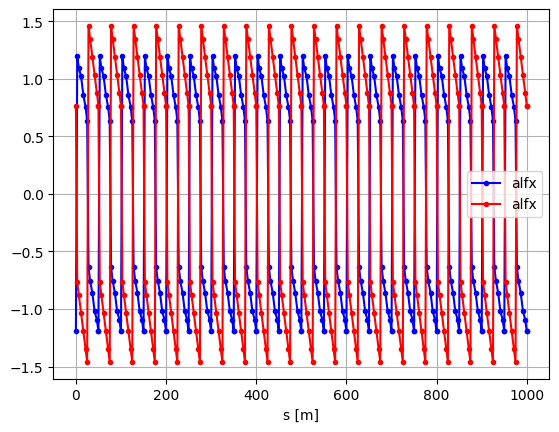

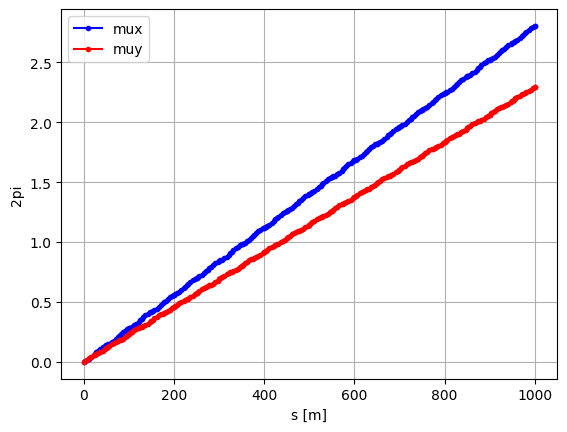

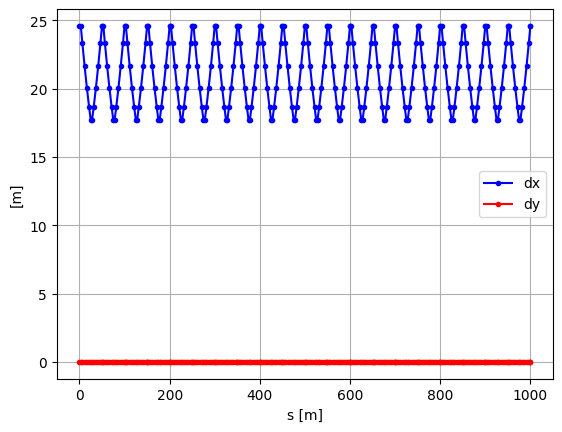

In [9]:
def plot_me(myTwiss):
    plt.plot(myTwiss.s,myTwiss.betx,'.-b', label='betx')
    plt.plot(myTwiss.s,myTwiss.bety,'.-r', label='bety')
    plt.ylabel('[m]')
    plt.xlabel('s [m]')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.alfx,'.-b', label='alfx')
    plt.plot(myTwiss.s,myTwiss.alfy,'.-r', label='alfx')
    plt.xlabel('s [m]')
    plt.ylabel('')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.mux,'.-b', label='mux')
    plt.plot(myTwiss.s,myTwiss.muy,'.-r', label='muy')
    plt.xlabel('s [m]')
    plt.ylabel('2pi')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.dx,'.-b', label='dx')
    plt.plot(myTwiss.s,myTwiss.dy,'.-r', label='dy')
    plt.xlabel('s [m]')
    plt.ylabel('[m]')
    plt.grid()
    plt.legend()
plot_me(myTwiss)

### Can you inject a dipolar error to the machine to see something more interesting?

To do this we create a thin xt.Multipole element with a defined dipole coefficient. We make a copy of our original line and use the line.insert_element method to install the thin dipole kick into the line. 

In [10]:
env.vars['kick_strength'] = 0.0002
kick = env.new('kick', xt.Multipole, knl = ['kick_strength'], length = 0, order = 0)
line2 = env.new('line2', line)
line2.insert_element(kick, index = 'mq.f.line2')
line2.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.0,Multipole,kick,False,False,None,False,"Multipole(_order=np.int64(0), inv_factorial_or..."
1,0.0,Quadrupole,mq.f.line2,True,False,None,False,"Quadrupole(k1=0.0098, k1s=0, length=3, num_mul..."
2,3.0,Drift,drift_1.line2,True,False,None,False,Drift(length=3.5)
3,6.5,Bend,mb.line2,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
4,11.5,Drift,drift_2.line2,True,False,None,False,Drift(length=5)
...,...,...,...,...,...,...,...,...
257,986.5,Drift,drift_5.line2,True,False,None,False,Drift(length=5)
258,991.5,Bend,mb.line2,True,False,None,False,"Bend(length=5, k0=0.0157, k1=0, h=0.0157, mode..."
259,996.5,Drift,drift_6.line2,True,False,None,False,Drift(length=3.5)
260,1000.0,Marker,marker_end.line2,False,False,None,False,Marker(_dummy=np.int64(0))


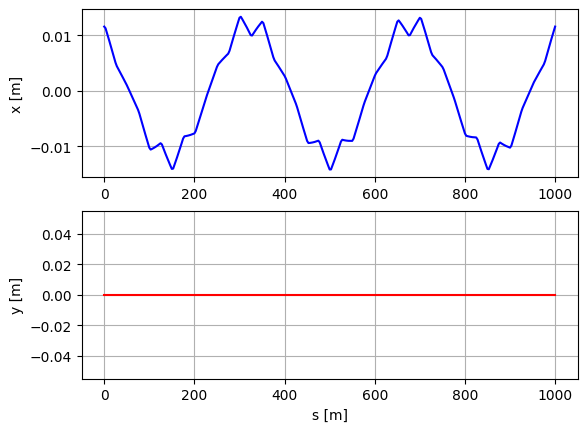

In [11]:
myTwissNew = line2.twiss(method = '4d')
plt.subplot(211)
plt.plot(myTwissNew.s,myTwissNew.x,'b',label='x')
plt.ylabel('x [m]')
plt.grid()

plt.subplot(212)
plt.plot(myTwissNew.s,myTwissNew.y,'r',label='y')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()

Please compare the previous plot with the closed form formula (see Eq. 8 in pag.54/98 of https://indico.cern.ch/event/780638/contributions/3370282/attachments/1859251/3054978/IntroductionToOpticsDesign.pdf), 
$$x_{CO}(s)=\frac{\sqrt{\beta_x(s)\beta_x(s_0)}}{2 \sin(\pi Q_x) } \theta_0 \cos(\phi - \pi Q_x),$$
where $\phi$ (>0) is the phase advance from $s_0$ (position of the $\theta_0$ kick) to the $s$.

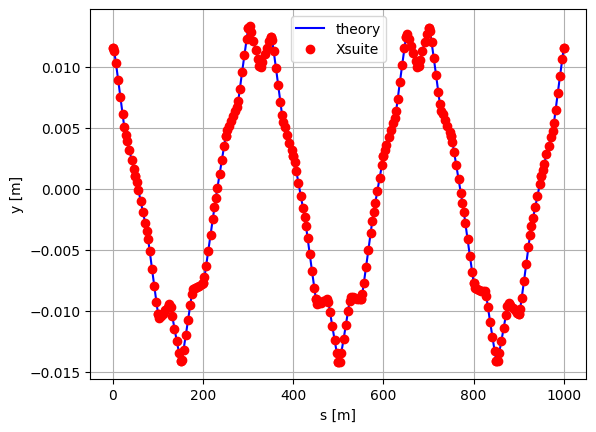

In [12]:
x=-np.sqrt(myTwissNew['betx']*myTwissNew['betx'][0])/2/np.sin(np.pi*myTwissNew['mux'][-1])*0.0002*np.cos(myTwissNew['mux']*2*np.pi-np.pi*myTwissNew['mux'][-1])
plt.plot(myTwissNew['s'],x,'b',label='theory')
plt.plot(myTwissNew['s'],myTwissNew['x'],'or',label='Xsuite')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()
plt.legend(loc='best')

#### What is the dispersive contribution of the kick?

In [13]:
env.vars['kick_strength'] = 0
myTwissRef = line2.twiss(method = '4d')

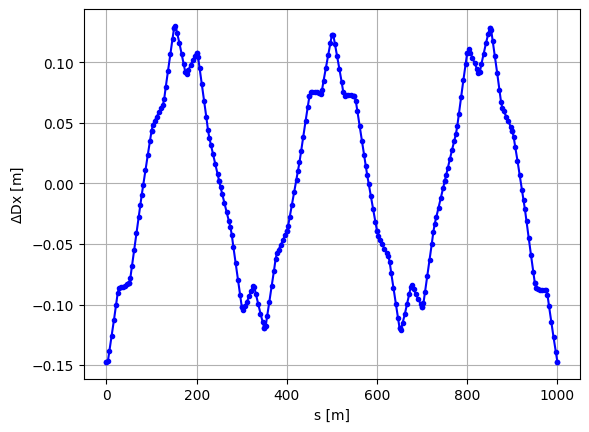

In [14]:
plt.plot(myTwissNew['s'],myTwissNew['dx']-myTwissRef['dx'],'.-b')
plt.xlabel('s [m]')
plt.ylabel(r'$\Delta$Dx [m]')
plt.grid()

## Beam envelope

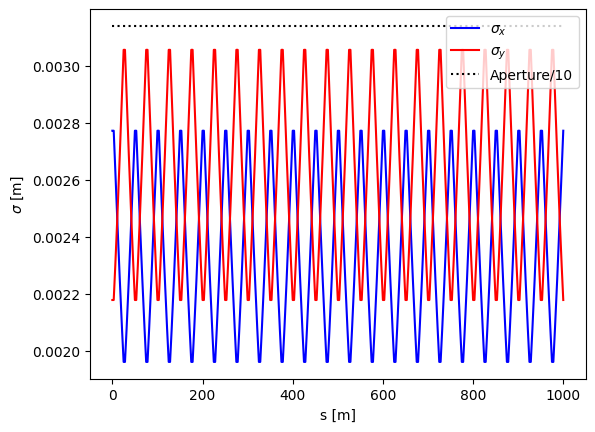

In [15]:
p_GeV_c=20.
E0_GeV=0.938 # approx
Etot_GeV=np.sqrt(p_GeV_c**2+E0_GeV**2)
Ekin_GeV=Etot_GeV-E0_GeV
aperture_limit=0.0314/10; #divide by 10 for 10 sigma limit
emittance_normalized_x=emittance_normalized_y=2.e-6

gamma=Etot_GeV/E0_GeV
beta=np.sqrt(1-1/gamma**2)
betagamma=beta*gamma

myTwiss['sigmax']=np.sqrt(myTwiss.betx*emittance_normalized_x/betagamma)
myTwiss['sigmay']=np.sqrt(myTwiss.bety*emittance_normalized_y/betagamma)

plt.plot(myTwiss.s,myTwiss.sigmax,'b', label = r'$\sigma_x$')
plt.plot(myTwiss.s,myTwiss.sigmay,'r', label = r'$\sigma_y$')

plt.plot(myTwiss.s, myTwiss.s*0+aperture_limit,'k:', label = 'Aperture/10')
plt.xlabel('s [m]')
plt.ylabel(r'$\sigma$ [m]');

plt.legend(loc=1)

## Dispersion contribution to the envelope

Let us assume $\Delta P/P_0 = 10^{-3}$.

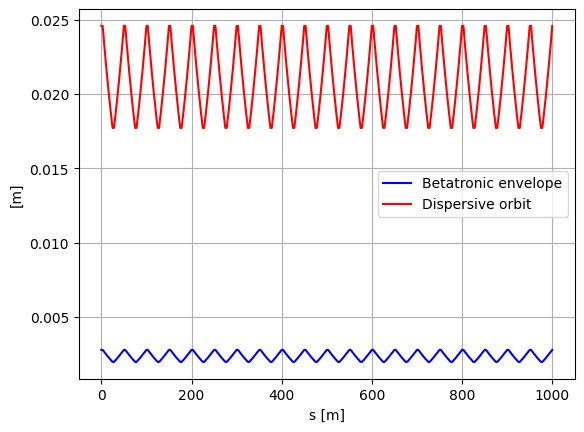

In [16]:
plt.plot(myTwiss.s,myTwiss.sigmax,'b', label='Betatronic envelope')
plt.plot(myTwiss.s,myTwiss.dx*1e-3,'r', label='Dispersive orbit')
plt.xlabel('s [m]')
plt.ylabel('[m]');
plt.grid(True)
plt.legend(loc='best')

## Tracking

Can you compute the particle trajectory if you start it (at s=0) with an offset of 1 mm (x'=0)?

In [17]:
line.build_tracker() #generate tracker for original line (no dipolar kick!)
particles = line.build_particles(
                        x=0.001) #create single particle with 1mm offset from closed orbit

In [18]:
n_turns = 1
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor='ONE_TURN_EBE') #track particle for 1 turn.
#Flag 'ONE_TURN_EBE' tells Xsuite to save particle data at each element for one turn
#Normally 'True' flag saves data once per turn only. 'False' flag does tracking for n_turns without saving intermediate steps

Text(0, 0.5, 'x [m]')

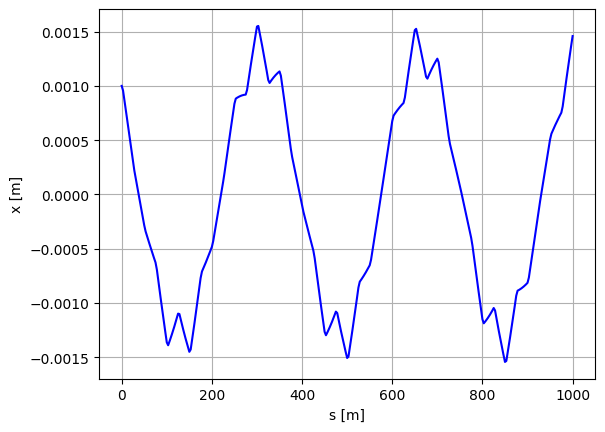

In [19]:
plt.plot(line.record_last_track.s.T, line.record_last_track.x.T, 'b')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('x [m]')

Can you plot the normalized $x(s)$ vs $\mu_x(s)$?

Remember that $$\bar{P}=\begin{pmatrix}
    \sqrt{\beta} &        0\\\\
    -\frac{\alpha}{\sqrt{\beta}} &  \frac{1}{\sqrt{\beta}} \end{pmatrix}=
    \begin{pmatrix}
    \sqrt{\beta} &        0\\\\
    0 &  \frac{1}{\sqrt{\beta}}
    \end{pmatrix}
    \begin{pmatrix}
    1 &        0\\\\
    \frac{\alpha}{\sqrt{\beta}} &  1
    \end{pmatrix},$$
and that to transform to normalised space $$
    \bar{X}=\bar{P}^{-1} X.$$

In other words, you need to divide $x(s)$ by $\sqrt{\beta(s)}$.

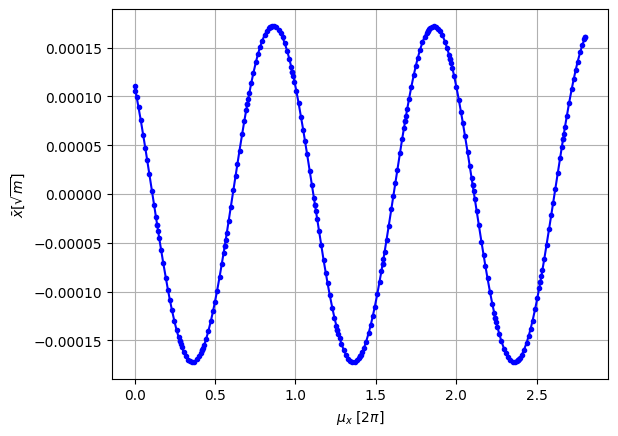

In [20]:
xs = line.record_last_track.x.flatten()
normx = xs/np.sqrt(myTwiss['betx'])

plt.plot(myTwiss['mux'],normx,'b.-')

plt.grid()
plt.xlabel(r'$\mu_x$ [2$\pi$]')
plt.ylabel(r'$\bar{x}$[$\sqrt{m}$]');

Can you determine the machine tune by a numerical experiment (tracking)?

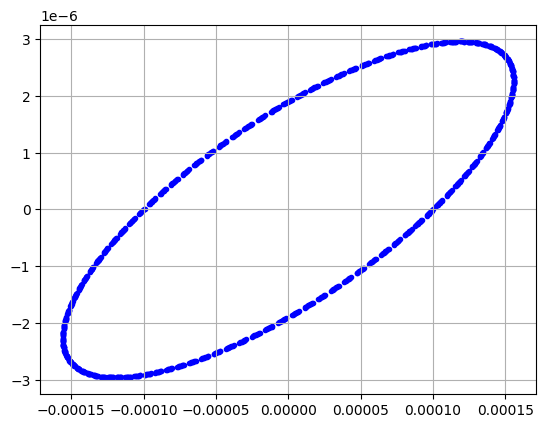

In [21]:
particles = line.build_particles(
                        x=0.0001) #generate single particle

n_turns = 2**10
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True) #track for large number of turns and save position at same point each turn
myParticle = line.record_last_track
plt.scatter(myParticle.x.T, myParticle.px.T, marker = '.', color = 'b') #plot phase space ellipse from tracking over successive turns
plt.grid()

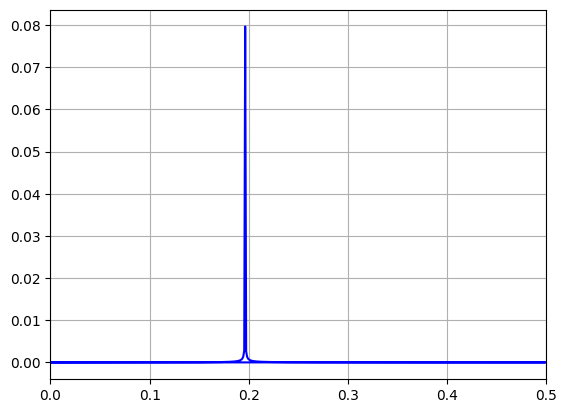

In [22]:
myAmplitude=np.abs(np.fft.fft(myParticle.x.flatten())); #use Fast Fourier Transform (FFT) to measure tune
myTunes=np.fft.fftfreq(n_turns)

plt.plot(myTunes,myAmplitude, 'b')
plt.xlim([0,0.5])
plt.grid()

In [23]:
myTunes[np.argmax(myAmplitude)] #select maximum

np.float64(0.1962890625)

In [24]:
#to compare with
np.round(myTwiss.qx)-myTwiss.qx #subtract integer part of tune

np.float64(0.1962557258086588)

In general we can use in our frequency analysis the fact that we expect to have well separated harmonic oscillations and they are time-constant.

The NAFF algorithm of J. Laskar can be used as an alternative for the FFT. A python library with an implementation of the algorithm is found in https://pypi.org/project/nafflib/ - how does it compare to the FFT for tune computation?

In [25]:
import nafflib
import numpy as np

t = np.linspace(1, 1024, num=1024, endpoint=True)
signal = myParticle.x.flatten()
# outputs an array of arrays for each frequency. Each sub-array includes:
# [order of harmonic, frequency, Amplitude, Re{Amplitude}, Im{Amplitude]

myListNAFF=[]
myListFFT=[]
for i in np.arange(10,1025):
    myListNAFF.append(nafflib.tune(signal[0:i]))
    myAmplitude=np.abs(np.fft.fft(signal[0:i]));
    myTunes=np.linspace(0,1,i)
    myListFFT.append(np.min(myTunes[myAmplitude==np.max(myAmplitude)]))

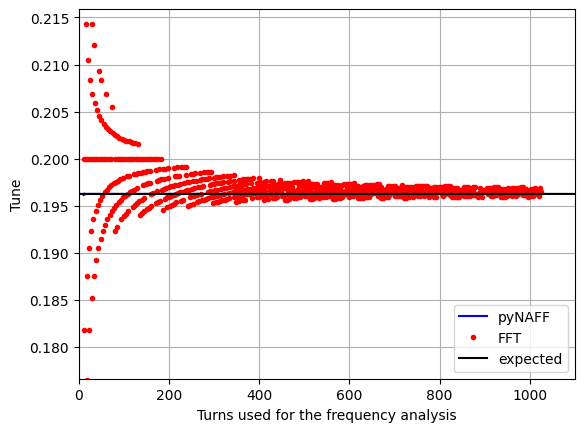

In [26]:
Qx = np.round(myTwiss.qx)-myTwiss.qx
myFig=plt.figure()
plt.plot(np.arange(10,1025),myListNAFF,'b',label='pyNAFF')
plt.plot(np.arange(10,1025),myListFFT,'.r',label='FFT')
plt.plot(np.arange(0,2000),3-myTwiss.qx+np.arange(0,2000)*0,'k',label='expected')
plt.grid()
plt.ylim(Qx*0.9,Qx*1.1)
plt.xlim(0,1100)
plt.xlabel('Turns used for the frequency analysis')
plt.ylabel('Tune')
plt.legend(loc='best')

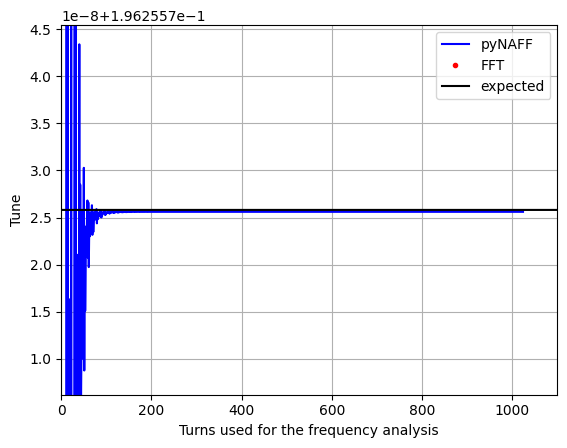

In [27]:
myFig.gca().set_ylim(Qx*0.9999999,Qx*1.0000001)
display(myFig)